In [1]:
using DifferentialEquations
using Plots
using Flux: gradient
using LinearAlgebra

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


Problem kepler adalah problem lintasan orbit dan salah satu bagian dari contoh gaya sentral, yang dimana memiliki potensial proposional terhadap $-1/r$,

$$
U(r) \approx -\frac{1}{r}
$$

problem persamaan differensial ini bisa di selesaikan dengan cara hamiltonian.

$$
H(p,q) = T(p,q) + V(p,q)
$$

problem kepler 2D pada koordinat kartesian memiliki hamiltonian

$$
H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}}, \quad \quad m = 1, G = 1
$$

evolusi dinamik objek yang dalam hamiltonian tersebut dapat dilihat dengan
$$
\dot{p} = -\frac{\partial H}{\partial q} \quad \text{dan} \quad \dot{q} = \frac{\partial H}{\partial p}
$$

problem ini dapat diimplementas sebagai problem dinamik

```julia
DynamicalODEProblem(vdot,qdot,v0,u0,ts,p,cb)
```

In [61]:
H(q,p) = norm(p)^2/2 - inv(norm(q))

# ∇H
grad!(dx,args...) = dx .= gradient(args...)[1]

pdot(dp,p,q,params,t) = grad!(dp, q -> -H(q,p), q)
qdot(dq,p,q,params,t) = grad!(dq, p ->  H(q,p), p)

  1.555871 seconds (4.21 M allocations: 173.041 MiB, 1.75% gc time)


In [68]:
# nilai awal
p0 = [0.0,2.3]
q0 = [0.2,0.0]
ts = (0.0,50.0)

# selesaikan
prob = DynamicalODEProblem(pdot,qdot,p0,q0,ts)
@time sol = solve(prob,RK4());

  0.632560 seconds (5.77 M allocations: 184.336 MiB, 4.02% gc time)


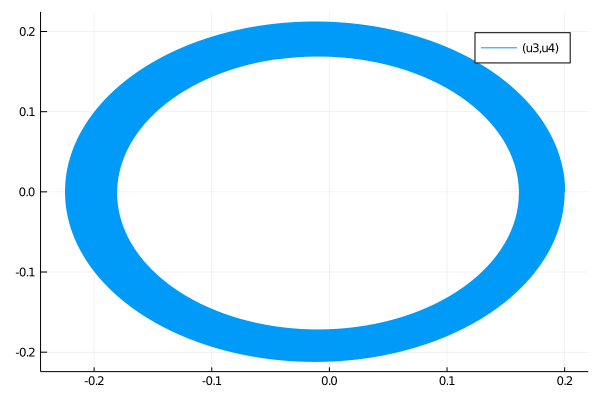

In [63]:
plot(sol, vars=(3,4))

### Cek konservasi momentum linear dan energi

$$
E(q,p) = H(q,p)
$$

$$
l(q,p) = q \times r
$$

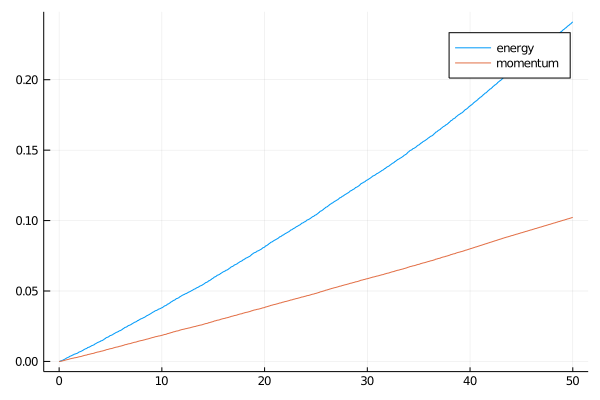

In [66]:
l(q,p) = q[1] * p[2] - q[2] * p[1]

# variation of energy and momentum
ΔE = (H(q0,p0) .- map(u -> H(u[2,:],u[1,:]),sol.u)) / abs(H(q0,p0)) #E0 - Ei
Δl = (l(q0,p0) .- map(u -> l(u[2,:],u[1,:]),sol.u)) / abs(l(q0,p0)) #l0 - li

plot(sol.t, ΔE, label="energy")
plot!(sol.t, Δl, label="momentum")